<a href="https://colab.research.google.com/github/saharCoder/MachineLearning/blob/main/PenguinDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download larsen0966/penguins

  0% 0.00/3.78k [00:00<?, ?B/s]
100% 3.78k/3.78k [00:00<00:00, 13.8MB/s]


In [ ]:
! unzip penguins.zip

Archive:  penguins.zip
  inflating: penguins.csv            


In [ ]:
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
 
#Importing the Decision Tree from scikit-learn library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import sklearn.multiclass

In [ ]:
df=pd.read_csv('penguins.csv')

In [ ]:
df.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [ ]:
df=df.drop(['Unnamed: 0','year'],axis=1)

In [ ]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
#Get insights from the dataset
#how many observation do we have?
df.shape

(344, 7)

In [ ]:
print('The data contain the following columns:\n',df.columns)

The data contain the following columns:
 Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df_groupbysp=df.groupby('species')

In [ ]:
df_groupbysp.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
print("Total Missing Values: ",df.isnull().sum().sum() )

Total Missing Values:  19


In [ ]:
df_AD=df[df['species']=='Adelie']
df_Ge=df[df['species']=='Gentoo']
df_Ch=df[df['species']=='Chinstrap']

In [ ]:
df_AD.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
df_Ge.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female
159,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,male
160,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,female
161,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,male


In [ ]:
df_Ch.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female
277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male
278,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male
279,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female
280,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male


In [ ]:
df_AD.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

In [ ]:
df_Ge.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  5
dtype: int64

In [ ]:
df_Ch.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
m=df_AD.body_mass_g

In [ ]:
m.mean()

3700.662251655629

In [ ]:
df_AD.body_mass_g=df_AD.body_mass_g.fillna(m.mean())

<ipython-input-46-459a43c9f94b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AD.body_mass_g=df_AD.body_mass_g.fillna(m.mean())


In [ ]:
df_AD.sex.value_counts()

male      73
female    73
Name: sex, dtype: int64

In [ ]:
df_AD.sex=df_AD.sex.fillna('female')

<ipython-input-48-a8735b0a3508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AD.sex=df_AD.sex.fillna('female')


In [ ]:
df_AD.fillna(df_AD.mean(),inplace=True)

<ipython-input-49-b72f2f97943e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_AD.fillna(df_AD.mean(),inplace=True)
<ipython-input-49-b72f2f97943e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AD.fillna(df_AD.mean(),inplace=True)


In [ ]:
df_AD.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df_Ge.isnull().sum()

species              0
island               0
bill_length_mm       1
bill_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  5
dtype: int64

In [ ]:
df_Ge.sex.value_counts()

male      61
female    58
Name: sex, dtype: int64

In [ ]:
df_Ge.sex.fillna('female',inplace=True)

<ipython-input-53-4d668bb064a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ge.sex.fillna('female',inplace=True)


In [ ]:
df_Ge.fillna(df_Ge.mean(),inplace=True)

<ipython-input-54-12ff47202157>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Ge.fillna(df_Ge.mean(),inplace=True)
<ipython-input-54-12ff47202157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ge.fillna(df_Ge.mean(),inplace=True)


In [ ]:
df_Ch.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
data = [df_AD, df_Ge]
concated = pd.concat(data)

In [ ]:
concated

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,female
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,47.504878,14.982114,217.186992,5076.016260,female
272,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,female
273,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,male
274,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,female


In [ ]:
data = [concated, df_Ch]
concated=pd.concat(data)

In [ ]:
concated

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,female
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.800000,19.800000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.500000,18.100000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.600000,18.200000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.800000,19.000000,210.000000,4100.000000,male


In [ ]:
df=concated

In [ ]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,female
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female
5,Adelie,Torgersen,39.300000,20.600000,190.000000,3650.000000,male
6,Adelie,Torgersen,38.900000,17.800000,181.000000,3625.000000,female
7,Adelie,Torgersen,39.200000,19.600000,195.000000,4675.000000,male
8,Adelie,Torgersen,34.100000,18.100000,193.000000,3475.000000,female
9,Adelie,Torgersen,42.000000,20.200000,190.000000,4250.000000,female


In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
print('There are ',df.duplicated().sum(),' duplicated row in the dataset')

There are  0  duplicated row in the dataset


In [ ]:
#one hot encoding to train a machine learning model
dd=df
dd = pd.get_dummies(df.sex, prefix='sex')
print(dd.head())

   sex_female  sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           1         0


In [ ]:
dd

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
339,0,1
340,1,0
341,0,1
342,0,1


In [ ]:
df=pd.concat([df,dd],axis=1)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_female,sex_male
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male,0,1
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female,1,0
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female,1,0
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,female,1,0
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female,1,0


In [ ]:
df.drop('sex',axis=1,inplace=True)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,0,1
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,1,0
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,1,0
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,1,0
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,1,0


In [ ]:
dd = pd.get_dummies(df.island, prefix='island')
print(dd.head())

   island_Biscoe  island_Dream  island_Torgersen
0              0             0                 1
1              0             0                 1
2              0             0                 1
3              0             0                 1
4              0             0                 1


In [ ]:
df=pd.concat([df,dd],axis=1)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,1
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,1,0,0,0,1
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,1,0,0,0,1
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,1,0,0,0,1
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,1,0,0,0,1


In [ ]:
df.drop('island',axis=1,inplace=True)

In [ ]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,1,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,1
1,1,39.500000,17.400000,186.000000,3800.000000,1,0,0,0,1
2,1,40.300000,18.000000,195.000000,3250.000000,1,0,0,0,1
3,1,38.791391,18.346358,189.953642,3700.662252,1,0,0,0,1
4,1,36.700000,19.300000,193.000000,3450.000000,1,0,0,0,1


In [ ]:
df.replace(to_replace="Adelie",value=1,inplace=True)

In [ ]:
df.replace(to_replace=['Gentoo','Chinstrap'],value=[2,3],inplace=True)

In [ ]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,1,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,1
1,1,39.500000,17.400000,186.000000,3800.000000,1,0,0,0,1
2,1,40.300000,18.000000,195.000000,3250.000000,1,0,0,0,1
3,1,38.791391,18.346358,189.953642,3700.662252,1,0,0,0,1
4,1,36.700000,19.300000,193.000000,3450.000000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,3,55.800000,19.800000,207.000000,4000.000000,0,1,0,1,0
340,3,43.500000,18.100000,202.000000,3400.000000,1,0,0,1,0
341,3,49.600000,18.200000,193.000000,3775.000000,0,1,0,1,0
342,3,50.800000,19.000000,210.000000,4100.000000,0,1,0,1,0


In [ ]:
#Now we need to split the target columns
y=df.species

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [ ]:
x=df.drop('species',axis=1)

In [ ]:
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,39.100000,18.700000,181.000000,3750.000000,0,1,0,0,1
1,39.500000,17.400000,186.000000,3800.000000,1,0,0,0,1
2,40.300000,18.000000,195.000000,3250.000000,1,0,0,0,1
3,38.791391,18.346358,189.953642,3700.662252,1,0,0,0,1
4,36.700000,19.300000,193.000000,3450.000000,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
print('The shape of the X training data: ',X_train.shape)

The shape of the X training data:  (258, 9)


In [ ]:
print('The shape of the X Test data: ',X_test.shape)

The shape of the X Test data:  (86, 9)


In [ ]:
#Fitting the model:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dtree_predictions)

In [ ]:
dtree_predictions.shape #the prediction on the testing set

(86,)

In [ ]:
cm

array([[42,  0,  0],
       [ 0, 29,  0],
       [ 1,  0, 14]])

In [ ]:
# compute accuracy of the model
dtree_model.score(X_test, y_test)

0.9883720930232558

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


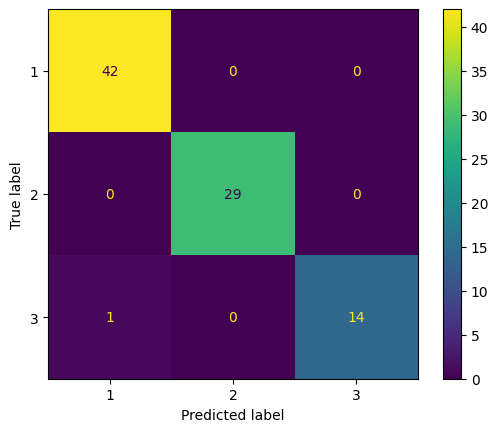

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree_model.classes_)
disp.plot()
plt.show()